# XY-calibration
##  Field 1

In [1]:
cd ..

/Users/Vincent/Github/FireBallPipe


In [2]:
# prerequisites:
previous_xy_mapping = 'Notebook/Files/Guider2UV_F1_nogamma.new.pkl'
mask_det_map_file = "Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
target_filename = 'Calibration/Targets/2022/targets_F4.txt'
mapping_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-82.fits"
new_diffuse_image = "/Users/Vincent/Nextcloud/LAM/FIREBALL/TestsFTS2018-Flight/E2E-AIT-Flight/all_diffuse_illumination/FocusEvolution/F1/F1_2022_6_-106.fits"

In [3]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import sys
import numpy as np
from astropy.io import fits
from astropy import wcs, coordinates
from astropy import units as u
from astropy.wcs.utils import proj_plane_pixel_scales
from matplotlib import pyplot as plt
from astropy.table import Table
import matplotlib.patches as patches

sys.path.insert(1, './Calibration')
from guider2UV.guider2UV import Guider2UV, diff_skycoord, fit_model, plot_fit
from Calibration.mapping import Mapping

## initialization from last xy calib

In [4]:
G2UV = Guider2UV(filename=previous_xy_mapping)
F1 = Table.read(target_filename, format='ascii')
mask_det_map = Mapping(mask_det_map_file)

# print(G2UV)

FOV center angular position in guider <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
    (250.39272815, 36.41856381)>): (lon, lat) in deg
    (0.17639951, 0.0154012)>
FOV center pixel position in guider [array(1338.56657245), array(600.7867847)]


## Diffuse UV image

load new mapping

In [5]:
# mask_det_map_file = cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/Detector_Mask_mappings/mapping-mask-det-180612-F1.pkl'
# mask_det_map_file ="Calibration/Mappings/2022/mapping-mask-det-w-2022-5-F1.pkl"
# for ax, file in zip(axes,[mapping_diffuse_image,new_diffuse_image]])
data1 = fits.open(mapping_diffuse_image)[0].data[1366:1545,1900:2094]
data2 = fits.open(mapping_diffuse_image)[0].data[1366:1545,1900:2094]

from mpl_interactions import heatmap_slicer
fig, axes = heatmap_slicer(
    np.arange(data2.shape[1]),
    np.arange(data2.shape[0]),
    (data1, data2),
    slices="both",
    heatmap_names=("dataset 1", "dataset 2"),
    labels=("Some wild X variable", "Y axis"),
    interaction_type="move",
)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

In [6]:
G2UV.set_detector_mapping(mask_det_map, offsets = [1., 1.])


## Scan sequence

GC - 46 - 51 - 14 - 8 - 12 - 16 - 38 - 44

In [14]:

slits = ['46', '51', '14', '8', '12', '16', '38', '44'] 

movs, slits_coord = G2UV.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 159.4 arcsec ; CE: 256.9 arcsec
EL: 369.0 arcsec ; CE: 329.0 arcsec
EL: 478.0 arcsec ; CE: -245.0 arcsec
EL: 277.5 arcsec ; CE: -394.8 arcsec
EL: 187.0 arcsec ; CE: -342.1 arcsec
EL: 257.3 arcsec ; CE: -199.1 arcsec
EL: 229.1 arcsec ; CE: 131.8 arcsec
EL: 430.1 arcsec ; CE: 227.8 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 159.4 arcsec ; CE 256.9 arcsec ; image: True
EL: 209.6 arcsec ; CE 72.0 arcsec ; image: True
EL: 109.0 arcsec ;

In [15]:
movs.sum(axis=0)

array([0., 0.])

observed slits position :

In [16]:
slits_coord_obs_det = np.array([
       [1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
#retour
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

slits_coord_obs_det

array([[1965.59756538,  420.22242579],
       [1631.74361865,  289.23423754],
       [1467.73408468, 1349.36778046],
       [1784.27150004, 1626.79774278],
       [1927.70920124, 1532.48181218],
       [1818.74748265, 1266.98195373],
       [1859.64545293,  654.1904897 ],
       [1539.18268865,  478.63015312],
       [1538.98978056,  473.42365165],
       [1859.70918054,  650.33623459],
       [1819.23982594, 1263.17030059],
       [1927.97229623, 1527.29654425],
       [1784.71779993, 1630.64211506],
       [1468.24324699, 1354.89013602],
       [1631.89394058,  287.11784832],
       [1966.20476903,  416.24326822]])

In [17]:
slits_coord_obs_det.shape

(16, 2)

In [20]:
valid = np.isfinite(slits_coord_obs_det[:,0])
#valid = np.array([True]*8 + [False]*8)
try:
    obs_wave = G2UV.mask_det_map.w[0]
except TypeError:
    obs_wave = 0.2139

print("wave: ", obs_wave)

slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.2139


In [21]:
slits_coord_valid

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.08891379, -0.14690964)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.20579385, -0.1881087)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.26655888, 0.14008058)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.15476134, 0.22577978)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.10425847, 0.1956433)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (l

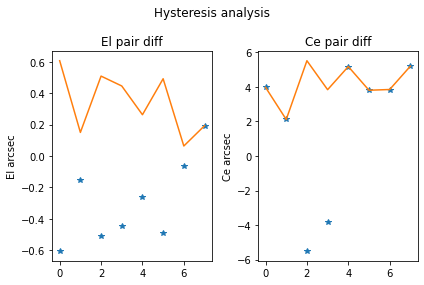

In [25]:
mid  = len(slits_coord_obs_det)//2
pair_diff = slits_coord_obs_det[:mid] - slits_coord_obs_det[::-1][:mid]
pair_diff
fig, (ax0,ax1) = plt.subplots(1,2)
# plt.subplot('120')
ax0.plot(pair_diff[:,0],'*')
ax0.plot(np.abs(pair_diff[:,0]),'-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
# plt.subplot('121')
ax1.plot(pair_diff[:,1],'*')
ax1.plot(np.abs(pair_diff[:,1]),'-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()


In [26]:
slits_coord_obs = G2UV.detector2guider(slits_coord_obs_det, wave=obs_wave, angle=True  )


Fitting rotation, translation and magnification
gamma: 1.2582890786759133
theta: 166.1725214345588 arcmin
dx: 191.47275241562704 arcsec
dy: 143.76403179431682 arcsec
variances: [4.11192686e-04 1.41357633e+00 3.51871332e-01 3.51871332e-01]

residuals in arcsec: [[ 516.85642567 -160.17442312]
 [-213.50836186 -180.71133539]
 [-651.8055848   123.15312861]
 [  27.76957804  186.77818193]
 [ 352.05676075  157.34254805]
 [ 130.62908885   87.21101199]
 [ 265.82867835  -87.92370214]
 [-429.3158276  -117.37309736]
 [-429.53733877 -123.28445198]
 [ 265.92445684  -92.20074649]
 [ 131.34161242   83.01104739]
 [ 352.55226895  151.61309366]
 [  28.22122756  191.03823626]
 [-651.28896956  129.171393  ]
 [-213.3561316  -183.10900732]
 [ 517.63211677 -164.54187708]]
max residual in EL,CE 651.8, 191.0 arcsec
mean residual in EL,CE 376.6, 143.5 arcsec


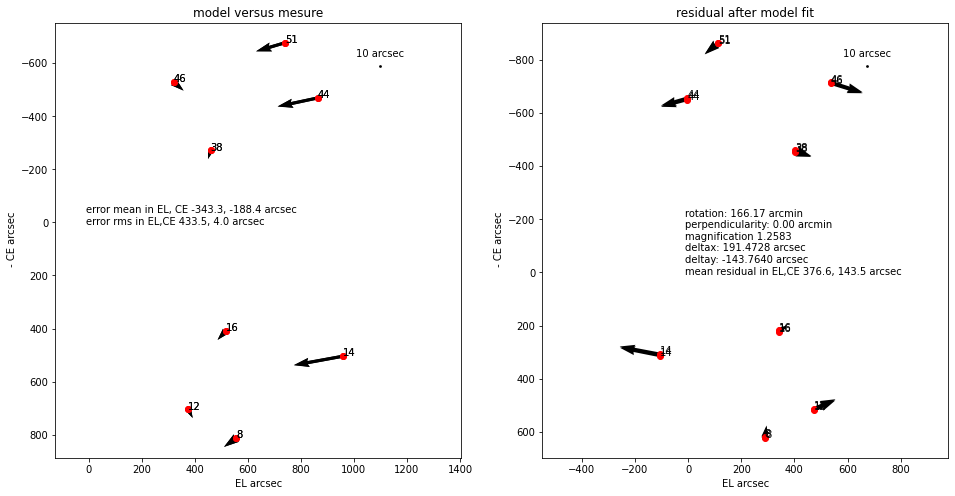

In [27]:
weight = np.array( [1.]*16  + [1./(1. + 1e-1)]*16)

G2UVcor = G2UV.update_model(slits_coord_valid, slits_coord_obs, labels=slits_valid, plot=True)

In [30]:
G2UVcor

(<guider2UV.guider2UV.Guider2UV at 0x7fa92333b520>,
 array([[ 0.14357123, -0.0444929 ],
        [-0.05930788, -0.05019759],
        [-0.18105711,  0.0342092 ],
        [ 0.00771377,  0.05188283],
        [ 0.09779354,  0.04370626],
        [ 0.03628586,  0.02422528],
        [ 0.0738413 , -0.02442325],
        [-0.1192544 , -0.03260364],
        [-0.11931593, -0.03424568],
        [ 0.0738679 , -0.02561132],
        [ 0.03648378,  0.02305862],
        [ 0.09793119,  0.04211475],
        [ 0.00783923,  0.05306618],
        [-0.1809136 ,  0.03588094],
        [-0.05926559, -0.05086361],
        [ 0.1437867 , -0.04570608]]))

In [28]:
#G2UVcor.save(filename=cloudpath + 'TestsFTS2018-Flight/E2E-AIT-Flight/XYCalibration/F1_180904.pkl')

In [32]:
G2UVcor = G2UVcor[0] # must do that not sure why!
movs_new, slits_coord_new = G2UVcor.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 312.1 arcsec ; CE: 248.2 arcsec
EL: 580.6 arcsec ; CE: 326.6 arcsec
EL: 682.1 arcsec ; CE: -402.9 arcsec
EL: 420.2 arcsec ; CE: -579.8 arcsec
EL: 309.4 arcsec ; CE: -508.1 arcsec
EL: 407.0 arcsec ; CE: -332.0 arcsec
EL: 392.1 arcsec ; CE: 86.5 arcsec
EL: 651.3 arcsec ; CE: 195.5 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 312.1 arcsec ; CE 248.2 arcsec ; image: True
EL: 268.5 arcsec ; CE 78.3 arcsec ; image: True
EL: 101.5 arcsec ; 

## Star sequence

gc - s8 - s25 - s31

In [36]:
star_target_path = "Calibration/Targets/2022/GuidingStars/F1_guidingstars.fits"

F1_stars = Table.read(star_target_path, format='fits')

stars = [8, 25, 31]

star_movs, stars_coord = G2UVcor.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 303.9 arcsec ; CE: -260.3 arcsec
EL: 337.4 arcsec ; CE: -52.6 arcsec
EL: 272.2 arcsec ; CE: 9.8 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 303.9 arcsec ; CE -260.3 arcsec ; image: True
EL: 33.5 arcsec ; CE 207.7 arcsec ; image: True
EL: -65.2 arcsec ; CE 62.4 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 65.2 arcsec ; CE -62.4 arcsec ; image: True
EL: -33.5 arcsec ; CE -237.7 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -303.9 arcsec ; CE 260.3 arcsec ; image: True


In [37]:
stars_coord

[<SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.16947917, 0.14882094)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.18817587, 0.03006916)]>,
 <SkyCoord (SkyOffsetICRS: rotation=0.0 deg, origin=<ICRS Coordinate: (ra, dec) in deg
     (250.39272815, 36.41856381)>): (lon, lat) in deg
     [(0.15181327, -0.00561353)]>]

------------------------------------------------------

Re-compute model (thermal drift) ?

In [38]:
slits_coord_obs_det2 = np.array([
       [1967.77672211,  420.883372  ],
       [1634.94667484,  284.99941421],
       [1460.30889342, 1343.63228178],
       [1774.05043782, 1625.66456504],
       [1918.36655798, 1531.24794446],
       [1811.96613007, 1264.73988401],
       [1858.73062442,  652.77625595],
       [1539.37281284,  472.87952084],
#retour
       [1538.92830776,  467.65309777],
       [1858.32109489,  647.99384259],
       [1811.64481037, 1260.92668703],
       [1917.94530091, 1526.91879826],
       [1773.67417428, 1628.30043431],
       [1459.76904708, 1347.27853125],
       [1634.04334215,  281.33418915],
       [1966.71028008,  414.34595604]])
    
slits_coord_obs_det2

array([[1967.77672211,  420.883372  ],
       [1634.94667484,  284.99941421],
       [1460.30889342, 1343.63228178],
       [1774.05043782, 1625.66456504],
       [1918.36655798, 1531.24794446],
       [1811.96613007, 1264.73988401],
       [1858.73062442,  652.77625595],
       [1539.37281284,  472.87952084],
       [1538.92830776,  467.65309777],
       [1858.32109489,  647.99384259],
       [1811.64481037, 1260.92668703],
       [1917.94530091, 1526.91879826],
       [1773.67417428, 1628.30043431],
       [1459.76904708, 1347.27853125],
       [1634.04334215,  281.33418915],
       [1966.71028008,  414.34595604]])

In [40]:
valid = np.isfinite(slits_coord_obs_det2[:,0])
#valid = np.array([True]*8 + [False]*8)
try:
    obs_wave = G2UV.mask_det_map.w[0]
except TypeError:
    obs_wave = 0.2139
print("wave: ", obs_wave)

#slits_coord_valid = [slits_coord[i] for i in np.nonzero(valid)[0]]
#slits_valid = np.array(slits + slits[::-1])[valid]

wave:  0.2139


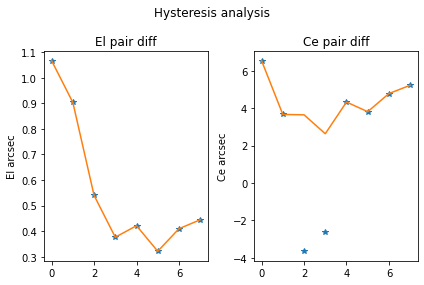

In [43]:
mid  = len(slits_coord_obs_det2)//2
pair_diff2 = slits_coord_obs_det2[:mid] - slits_coord_obs_det2[::-1][:mid]
pair_diff2

fig, (ax0,ax1) = plt.subplots(1,2)
# plt.subplot('120')
ax0.plot(pair_diff2[:,0],'*')
ax0.plot(np.abs(pair_diff2[:,0]),'-')
ax0.set_title("El pair diff")
ax0.set_ylabel("El arcsec")
# plt.subplot('121')
ax1.plot(pair_diff2[:,1],'*')
ax1.plot(np.abs(pair_diff2[:,1]),'-')
ax1.set_title("Ce pair diff")
ax1.set_ylabel("Ce arcsec")
fig.suptitle("Hysteresis analysis")
fig.tight_layout()



In [44]:
valid2 = np.array([True]*16)
valid2[[0,1,-1,-2]] = False
slits2 = np.array(slits_valid)[valid2]
print(slits2)

['14' '8' '12' '16' '38' '44' '44' '38' '16' '12' '8' '14']


In [45]:
slits_coord_obs2 = G2UV.detector2guider(slits_coord_obs_det2[valid2], wave=obs_wave, angle=True  )
slits_coord_valid2 = [slits_coord[i] for i in np.nonzero(valid2)[0]]
slits_valid2 = np.array(slits + slits[::-1])[valid2]

Fitting rotation, translation and magnification
gamma: 1.3303249915440634
theta: 639.7248836275115 arcmin
dx: 243.80056778963916 arcsec
dy: -15.961822743068684 arcsec
variances: [5.47067103e-04 1.88067817e+00 4.72118882e-01 4.72118882e-01]

residuals in arcsec: [[-609.22965321  125.62569954]
 [  -4.6030374   160.83986573]
 [ 322.60443817   98.52923084]
 [ 155.17623063   25.56721852]
 [ 387.52770687 -205.40564091]
 [-249.93006518 -198.45584837]
 [-250.46905093 -204.4030725 ]
 [ 387.02864149 -210.71657383]
 [ 154.85761762   21.35222232]
 [ 322.20548633   93.73506964]
 [  -5.15340658  163.74356315]
 [-610.01490782  129.58826588]]
max residual in EL,CE 610.0, 210.7 arcsec
mean residual in EL,CE 344.5, 150.7 arcsec


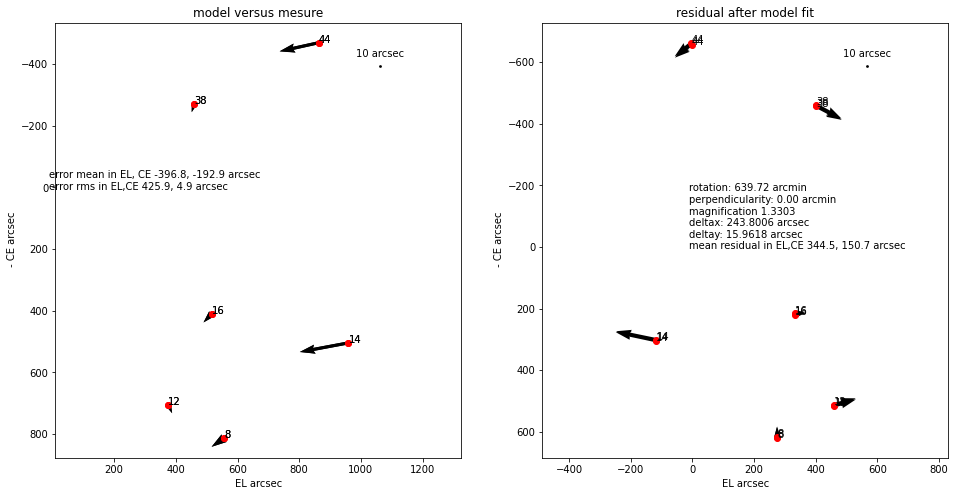

In [46]:
weight = np.array( [1.]*14  + [1./(1. + 1e-1)]*14)

G2UVcor2 = G2UV.update_model(slits_coord_valid2, slits_coord_obs2, labels=slits_valid2, plot=True)

In [48]:
G2UVcor2 = G2UVcor2[0]
star_movs2, stars_coord2 = G2UVcor2.compute_autocoll_move_stars(stars, F1_stars, hystcomp = True)


star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.1014, -5.786504)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.221491, -5.776507)]>
star position Ra/Dec:  <SkyCoord (ICRS): (ra, dec) in deg
    [(32.254526, -5.815258)]>

targets local coords in siderostat local frame:
EL: 327.2 arcsec ; CE: -203.4 arcsec
EL: 390.2 arcsec ; CE: 1.9 arcsec
EL: 333.1 arcsec ; CE: 73.6 arcsec

siderostat moves sequence: 
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 327.2 arcsec ; CE -203.4 arcsec ; image: True
EL: 63.0 arcsec ; CE 205.3 arcsec ; image: True
EL: -57.1 arcsec ; CE 71.7 arcsec ; image: True
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: False
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: True
EL: 57.1 arcsec ; CE -71.7 arcsec ; image: True
EL: -63.0 arcsec ; CE -235.3 arcsec ; image: False
EL: 0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: -327.2 arcsec ; CE 203.4 arcsec ; image: True


In [49]:
movs_new2, slits_coord_new2 = G2UVcor2.compute_autocoll_moves_slits(slits, F1, hystcomp = True)

slit position in mm on mask: [ 6.7589561 -3.858979 ]
slit position in mm on mask: [8.6160157 1.0303866]
slit position in mm on mask: [-5.1696728  3.934102 ]
slit position in mm on mask: [-8.8972191 -0.6960435]
slit position in mm on mask: [-7.6793793 -2.8581218]
slit position in mm on mask: [-4.190085  -1.2881544]
slit position in mm on mask: [ 3.7831595 -2.1462593]
slit position in mm on mask: [6.2134041 2.5275849]

targets local coords in siderostat local frame:
EL: 399.5 arcsec ; CE: 331.7 arcsec
EL: 697.8 arcsec ; CE: 377.4 arcsec
EL: 697.9 arcsec ; CE: -415.9 arcsec
EL: 391.9 arcsec ; CE: -567.8 arcsec
EL: 284.3 arcsec ; CE: -475.5 arcsec
EL: 414.6 arcsec ; CE: -301.3 arcsec
EL: 460.9 arcsec ; CE: 147.7 arcsec
EL: 753.8 arcsec ; CE: 227.5 arcsec

siderostat moves sequence: 
EL: 0.0 arcsec ; CE -30.0 arcsec ; image: False
EL: -0.0 arcsec ; CE 30.0 arcsec ; image: True
EL: 399.5 arcsec ; CE 331.7 arcsec ; image: True
EL: 298.4 arcsec ; CE 45.7 arcsec ; image: True
EL: 0.0 arcsec ; C